
# Project: Investigate Gapminder Dataset (environmental and economic indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Source**: Gapminder combines data from multiple sources into unique coherent time-series that can’t be found elsewhere. In this project, we will attempt to see if the are correlation between economic and environmental indicators in Brazil.

**Goal** We aim to see if the CO2 and Sulfur dioxide emissions per person are correlated with the Income Per Person value in Brazil. The main reason is that the evolution of economy may result in more impacts to the environment caused by the increase of fossil fuels use and the growth of industries.

> The carbon dioxide emissions from the burning of fossil fuels are expressed in metric tonnes of CO per person.
> Source: https://cdiac.ess-dive.lbl.gov/

> The dulfur dioxide emissions  are expressed in kilograms of sulfur per person).
> Source: https://ghdx.healthdata.org/gbd-201

> The Income Per Person ia a gross domestic product per person adjusted for differences in purchasing power(in international dollars)
> Source: Gapminder based on Word Bank

In [1]:
# importing statements 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 

In [2]:
#importing datasets as pandas dataframes

#CO2 emissions per person
CO2emissions = pd.read_csv('co2_emissions.csv')

#S emissions per person
Semissions = pd.read_csv('sulfur_emissions.csv')

#Income Per Person (IPP)
IPP = pd.read_csv('income_per_person.csv')


In [3]:
#understanding the data

CO2emissions.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [4]:
CO2emissions.dtypes

country     object
1799       float64
1800       float64
1801       float64
1802       float64
            ...   
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
Length: 220, dtype: object

In [5]:
Semissions.head()

,country,1849,1850,1851,1852,1853,1854,1855,1856,1857,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Aruba,1.24,0.818,1.53,1.36,1.67,1.6,2.19,2.49,2.6,...,201.00,203.00,204.00,206.00,207.00,209.00,211.00,212.00,214.00,216.00
1,Afghanistan,0,70µ,0.00013,0.0002,0.00026,0.00033,0.00039,0.00045,0.00051,...,3.99,3.73,3.40,3.23,3.16,3.14,3.12,3.11,3.09,3.14
2,Angola,30µ,30µ,50µ,80µ,0.00011,0.00013,0.00016,0.00018,0.00021,...,7.61,7.62,6.98,7.58,6.89,6.45,6.22,6.02,5.75,4.75
3,Albania,0.00017,0.00019,0.00024,0.00026,0.0003,0.00034,0.00039,0.00042,0.00048,...,10.40,3.77,2.96,2.46,2.20,2.19,1.56,1.58,1.19,1.15
4,Netherlands Antilles,1.24,0.818,1.53,1.36,1.67,1.6,2.19,2.49,2.6,...,201.00,203.00,204.00,206.00,207.00,209.00,211.00,212.00,214.00,216.00


In [6]:
Semissions.dtypes

country     object
1849        object
1850        object
1851        object
1852        object
            ...   
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
Length: 152, dtype: object

In [7]:
IPP.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [8]:
IPP.dtypes

country    object
1799        int64
1800        int64
1801        int64
1802        int64
            ...  
2045       object
2046       object
2047       object
2048       object
2049       object
Length: 252, dtype: object

## Data Cleaning 

### Setting the time window between 1945 e 1995

#### Each dataset had his own time window. To make possible to compare the data I set a 50 years time window (from 1945 to 1995).

In [9]:
# CO2 emissions dataframe pivoting to filter data more easily (transforming the titles into rows)

CO2emissions_pivot = pd.melt(CO2emissions, id_vars =['country'], var_name = 'year', value_name = 'emission')
CO2emissions_pivot.head()

,country,year,emission
0,Afghanistan,1799,NaN
1,Angola,1799,NaN
2,Albania,1799,NaN
3,Andorra,1799,NaN
4,United Arab Emirates,1799,NaN


In [10]:
CO2emissions_pivot.dtypes

country     object
year        object
emission    object
dtype: object

In [11]:
#fixing year data type (its not possible make counts with string data type)

CO2emissions_pivot['year'] = CO2emissions_pivot['year'].astype(int)
CO2emissions_pivot.dtypes

country     object
year         int32
emission    object
dtype: object

In [12]:
# CO2 emissions df filtering in the correct year range using a query

CO2emissions_filtered = CO2emissions_pivot.query('year > 1944 & year < 1996')
CO2emissions_filtered.head()

,country,year,emission
28324,Afghanistan,1945,NaN
28325,Angola,1945,NaN
28326,Albania,1945,0.406
28327,Andorra,1945,NaN
28328,United Arab Emirates,1945,NaN


In [13]:
#S emissions df pivoting (as I did for CO2 emissions)

Semissions_pivot = pd.melt(Semissions, id_vars =['country'], var_name = 'year', value_name = 'emission')
Semissions_pivot.head()

,country,year,emission
0,Aruba,1849,1.24
1,Afghanistan,1849,0
2,Angola,1849,30µ
3,Albania,1849,0.00017
4,Netherlands Antilles,1849,1.24


In [14]:
Semissions_pivot.dtypes

country     object
year        object
emission    object
dtype: object

In [15]:
#fixing year data type (as I did for CO2 emissions)

Semissions_pivot['year'] = Semissions_pivot['year'].astype(int)
Semissions_pivot.dtypes

country     object
year         int32
emission    object
dtype: object

In [16]:
# S emissions df filtering in the correct year range (from 1995 to 1995)

Semissions_filtered = Semissions_pivot.query('year > 1944 & year < 1996')
Semissions_filtered.tail()

,country,year,emission
26602,Vietnam,1995,1.48
26603,Yemen,1995,1.52
26604,South Africa,1995,37.7
26605,Zambia,1995,45.1
26606,Zimbabwe,1995,6.82


In [17]:
#IPP incomings df pivoting (as I did for CO2 emissions)

IPP_pivot = pd.melt(IPP, id_vars =['country'], var_name = 'year', value_name = 'IPP')
IPP_pivot.head()

,country,year,IPP
0,Afghanistan,1799,674
1,Angola,1799,691
2,Albania,1799,746
3,Andorra,1799,1340
4,United Arab Emirates,1799,1120


In [18]:
IPP_pivot.dtypes

country    object
year       object
IPP        object
dtype: object

In [19]:
#fixing year data type (as I did for CO2 emissions)

IPP_pivot['year'] = IPP_pivot['year'].astype(int)
IPP_pivot.dtypes

country    object
year        int32
IPP        object
dtype: object

In [20]:
# IPP incomings df filtering in the correct year range
IPP_filtered = IPP_pivot.query('year > 1944 & year < 1996')
IPP_filtered.tail()

,country,year,IPP
38410,Samoa,1995,4370
38411,Yemen,1995,4440
38412,South Africa,1995,9760
38413,Zambia,1995,1980
38414,Zimbabwe,1995,3520


In [21]:
#saving filtered datasets with the alias "clear"

CO2emissions_filtered.to_csv('CO2_clear.csv')
Semissions_filtered.to_csv('S_clear.csv')
IPP_filtered.to_csv('IPP_clear.csv')

In [22]:
#importing the clear datasets

CO2_clear = pd.read_csv('CO2_clear.csv')
S_clear = pd.read_csv('S_clear.csv')
IPP_clear = pd.read_csv('IPP_clear.csv')

In [23]:
#dropping rows with NaN (to avoid problems in the data analysis)

CO2_clear.dropna(axis=0, how='any', inplace=True)
S_clear.dropna(axis=0, how='any', inplace=True)
IPP_clear.dropna(axis=0, how='any', inplace=True)

In [24]:
#checking if any of columns has null values

CO2_clear.isnull().sum().any()

False

In [25]:
#checking if any of columns has null values

S_clear.isnull().sum().any()

False

In [26]:
#checking if any of columns has null values

IPP_clear.isnull().sum().any()

False

#### When the IPP values are more than 1000, the original dataset uses a 'k' rather than the zeros.
#### To fix I used a mask to track and replace the 'k' for the correct number.

In [27]:
#creating the mask to filter data in the IPP columns with a 'k'

mask = IPP_clear['IPP'].str.contains('k')

In [28]:
#removing the 'k' and converting to int (its not possible to make counts with string datatype)

IPP_clear['IPP'] = IPP_clear['IPP'].str.extract('(\d+)').astype(int)

In [29]:
#using the mask to multiply for 1000 the values that originally had a 'k'

IPP_clear['IPP'][mask] = IPP_clear['IPP'][mask]*1000

C:\Users\iara\AppData\Local\Temp\ipykernel_37912\1518195736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPP_clear['IPP'][mask] = IPP_clear['IPP'][mask]*1000


In [30]:
#checking data type

IPP_clear.dtypes

Unnamed: 0     int64
country       object
year           int64
IPP            int32
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - There are indications of the correlation between IPP and CO2 emissions per person in Brazil?

#### To avoid repetitive coding I created a function named "brazil" to filter the data only for this country

In [31]:
# creating the brazil function

def brazil(df):
    '''
    Returns the dataframe only with data from Brazil.
    Parameters
        df (str): a dataframe
    Returns:
        the dataframe filtered with the columns "Country" filtered for Brazil.
    '''
    #copy dataframe
    temp = df.copy()
    #filter the column country for strings that contains "Brazil"
    temp = temp[df['country'].str.contains('Brazil', na=False)]
    
    return temp

In [32]:
#filtering the IPP data for Brazil 

IPP_BR = brazil(IPP_clear)
IPP_BR.dtypes



Unnamed: 0     int64
country       object
year           int64
IPP            int32
dtype: object

In [33]:
#filtering the CO2 emissions per person data for Brazil 
CO2_BR = brazil(CO2_clear)
CO2_BR.dtypes

Unnamed: 0      int64
country        object
year            int64
emission      float64
dtype: object

In [34]:
#merging the new datasets to analyse correlation

CO2_IPP = CO2_BR.merge(IPP_BR, on = 'year', how = 'inner')[['year', 'emission', 'IPP']]
CO2_IPP.head()

,year,emission,IPP
0,1945,0.154,2220
1,1946,0.180,2250
2,1947,0.154,2410
3,1948,0.141,2540
4,1949,0.365,2570


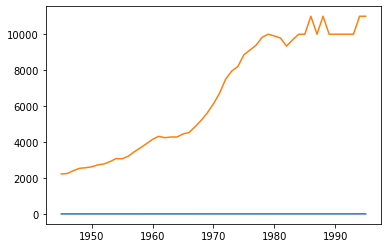

In [35]:
#plotting CO2 emissions per person x IPP

plt.plot(CO2_IPP['year'], CO2_IPP['emission'])
plt.plot(CO2_IPP['year'], CO2_IPP['IPP'])

 #### The plot above didn't work well because the data is in different scales.
 #### To correct that I first normalized the data.

In [36]:
#data normalizing

emission_norm = CO2_IPP['emission']/max(CO2_IPP['emission'])
IPP_norm = CO2_IPP['IPP']/max(CO2_IPP['IPP'])

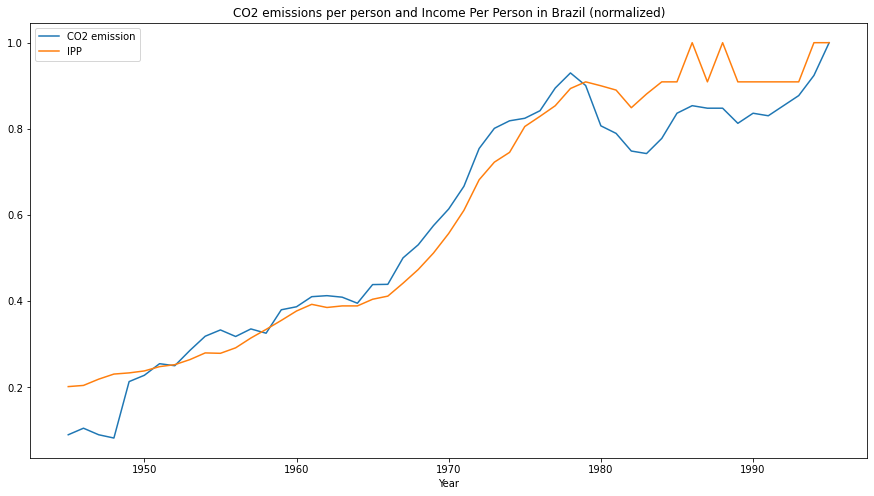

In [37]:
#this plot allows to visualize the correlation between CO2 emissions per person and IPP in Brazil

plt.figure (figsize = (15, 8))

plt.plot(CO2_IPP['year'], emission_norm)
plt.plot(CO2_IPP['year'], IPP_norm)

plt.xlabel('Year')
plt.title('CO2 emissions per person and Income Per Person in Brazil (normalized)')
plt.grid(False)
plt.savefig("CO2IPP.png")
plt.legend (['CO2 emission', 'IPP'])
plt.show()

#### From the plot above its possible to see that the CO2 emissions increase its also followed for the IPP increase as the both lines (blue and orange) are getting higher through the time.

### Research Question 2 - There are indications of the correlation between IPP and S emissions per person in Brazil?

In [38]:
#calling the brazil function to filter the data for Brazil

S_BR = brazil(S_clear)

S_BR.dtypes

Unnamed: 0      int64
country        object
year            int64
emission      float64
dtype: object

In [39]:
#merging the new datasets to analyse correlation

S_IPP = S_BR.merge(IPP_BR, on = 'year', how = 'inner')[['year', 'emission', 'IPP']]
S_IPP.head()

,year,emission,IPP
0,1945,1.77,2220
1,1946,1.80,2250
2,1947,1.79,2410
3,1948,1.83,2540
4,1949,2.10,2570


In [40]:
#normalizing the data to make possible to compare

emission_normS = S_IPP['emission']/max(S_IPP['emission'])
IPP_normS = S_IPP['IPP']/max(S_IPP['IPP'])

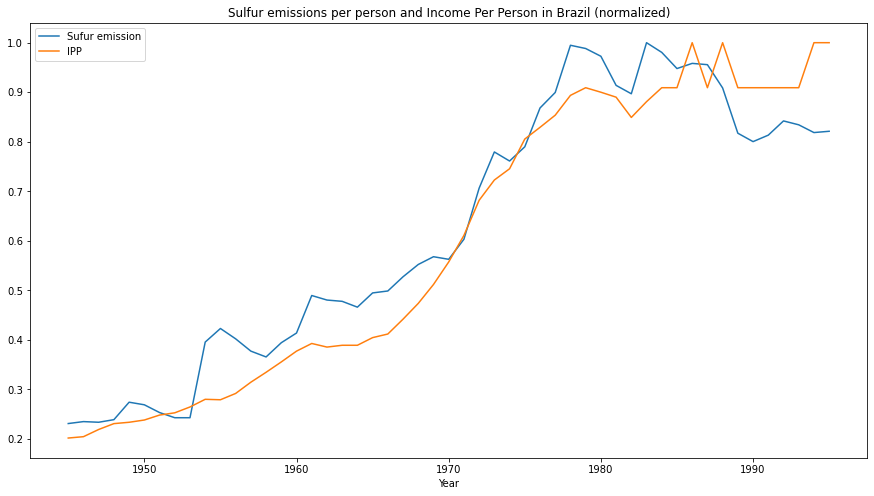

In [41]:
#plotting Sulfur emissions versus IPP in Brazil

plt.figure (figsize = (15, 8))

plt.plot(S_IPP['year'], emission_normS)
plt.plot(S_IPP['year'], IPP_normS)

plt.xlabel('Year')
plt.title('Sulfur emissions per person and Income Per Person in Brazil (normalized)')
plt.grid(False)
plt.savefig("SIPP.png")
plt.legend (['Sufur emission', 'IPP'])
plt.show()



#### From the plot above its possible to see that the Sulfur emissions increase its also followed for the IPP increase as the both lines (blue and orange) are getting higher through the time.

### Research Question 3 - How  the CO2 emissions per person in Brazil  compares with the other countries?

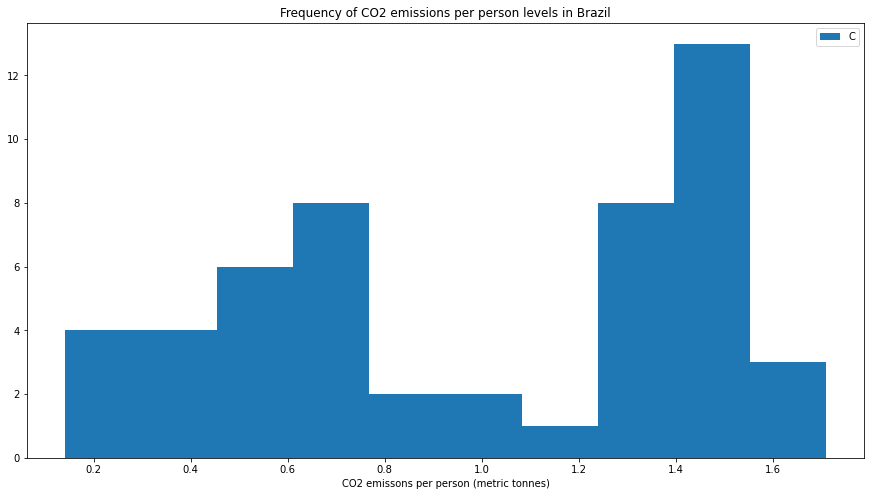

In [42]:
#analysing the caracteristics of CO2 emissions 

plt.figure (figsize = (15, 8))


CO2_BR['emission'].hist()
plt.xlabel('CO2 emissons per person (metric tonnes)')
plt.title('Frequency of CO2 emissions per person levels in Brazil')
plt.grid(False)
plt.savefig("CO2PP.png")
plt.legend ('CO2 emission per person')
plt.show()

#### For the histogram above, its possible to see that most of brazilians CO2 per person are in between 1.4 e 1.6  metric tonnes

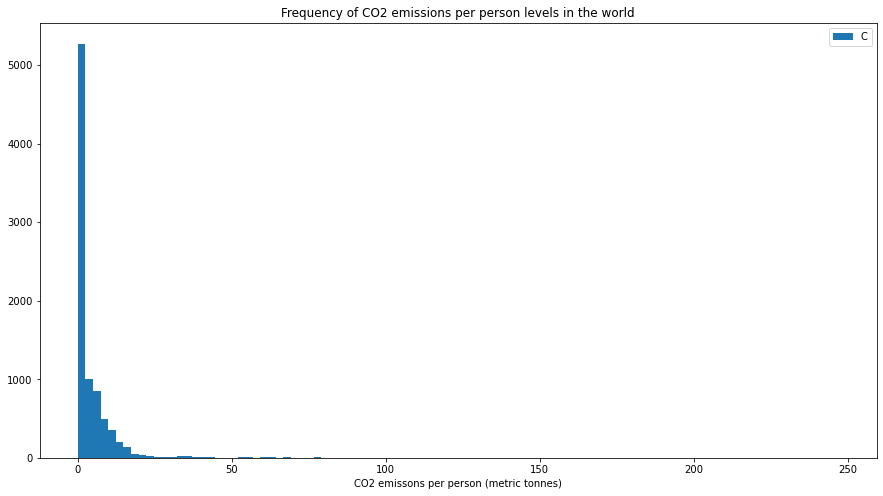

In [43]:
plt.figure (figsize = (15, 8))

CO2_clear['emission'].hist(bins=100)
plt.xlabel('CO2 emissons per person (metric tonnes)')
plt.title('Frequency of CO2 emissions per person levels in the world')
plt.grid(False)
plt.savefig("CO2W.png")
plt.legend ('CO2 emission per person')
plt.show()


#### For the histogram above, its possible to see that most of countries emissions of CO2 per person are in between 0 e 20  metric tonnes, indicating that Brazil CO2 emissions are close to the word average.

<a id='conclusions'></a>
## Conclusions

> **01**: For the plotting above, is possbile to infer that there are indications of the correlation between the increase of CO2 emissions per person and the IPP in Brazil. One possible explanations is that the development of a country implies in more industry and traffic, increasing the carbon emissions. The CO2 gas is one of the most importants Greenhouse Gas and contributes to the Climate Change effects.




> **2**:The same logic applies to Sulfur emissions. Most of the sulfur dioxide released into the environment comes from electric utilities. If the economy is growing the demand of power is probably growing too. The Sulfur emissions are conected with the acid rain and lungs deseases.


> **3**: The histrograms shows that the CO2 emissions per person in Brazil falls in the same range that the most CO2 emissions per person in the word. 

## Limitations

> Its important to observe that the data used in this project are sample data, collect all around the word with different metodologies, which implies uncertainty.

> Also the data cleaning fase also imples uncertainty due NaN values.

>Finally there is no statistical inference performed in this project analysis. The significance of the found results are not tested. 